# Heavy Label Check Example

In [1]:
# Import modules
from silac_dia_tools.label_check import file_io as io
from silac_dia_tools.label_check import get_peptide_details 
from silac_dia_tools.label_check import plot_spectra
from silac_dia_tools.label_check import process_peptide_details

In [2]:
# Set path to directory containing .raw files for label check, the msms.txt, and evidence.txt (MQ output with requantify on) 
path = 'G:/My Drive/Data/data/1 demo data/label check for EIF4F/'

In [3]:
# Get list of thermo .raw files for the label check (DDA)
raw_files = io.list_raw_files(path)

found the following raw files for label check ['Fozzie_20230426_RJK_HS_vneo1_eif4fSpikeIn.raw']


In [4]:
#import MQ and thermo raw file data
msms = io.import_file(f"{path}msms.txt")
evidence = io.import_file(f"{path}evidence.txt")
ms1_dfs = io.get_raw_data(path, raw_files, 1000)

Begin processing Fozzie_20230426_RJK_HS_vneo1_eif4fSpikeIn.raw
[    1     2     3 ... 57678 57679 57680]


100%|███████████████████████████████████████████████████████████████████████████| 57680/57680 [01:48<00:00, 532.82it/s]


In [5]:
# get peptide details for most abundant H peptides containing K, R, and P
peptides = get_peptide_details.get_most_abundant_krp_peptide(msms,evidence) 

c:\phd projects\silac_dia_toolsv1.0\silac_dia_tools_1.0\silac_dia_tools\label_check\get_peptide_details.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sequence = df_sorted[condition].iloc[0]
c:\phd projects\silac_dia_toolsv1.0\silac_dia_tools_1.0\silac_dia_tools\label_check\get_peptide_details.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sequence = df_sorted[condition].iloc[0]


In [6]:
# process details and save temp csv
process_peptide_details.process_details(peptides, ms1_dfs, path)

AGFAGDDAPR
EIAQDFK
EIQTAVR


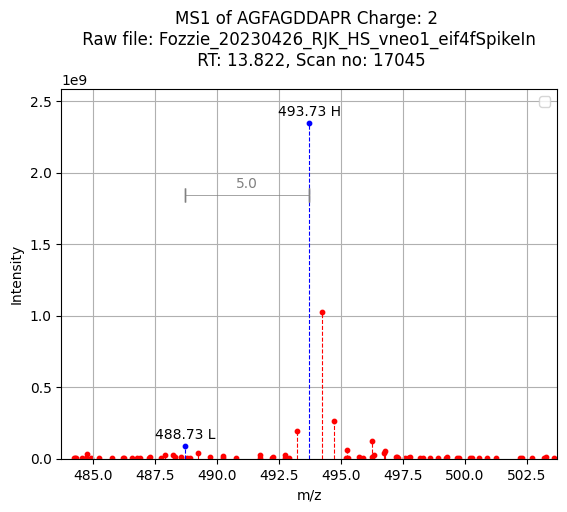

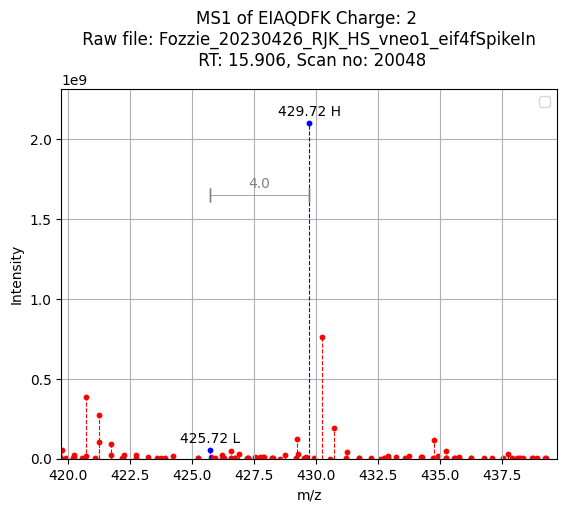

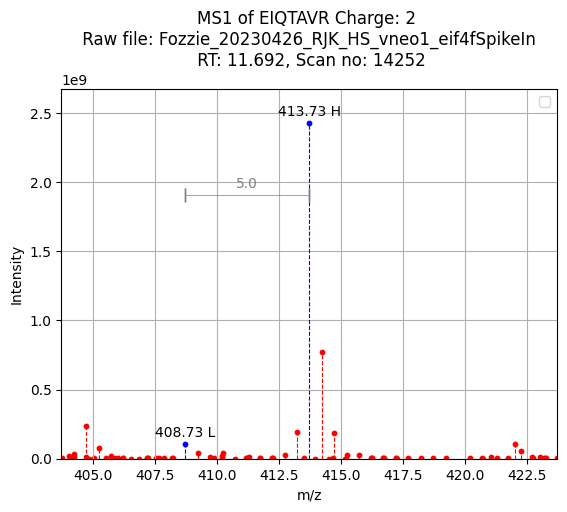

In [7]:
# import and plot data
plot_spectra.import_ms_data_for_plotting(path, peptides)